In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nolimitmide/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nolimitmide/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
df = pd.read_csv('admin.csv')

In [4]:
df.head()

,id,text,Rating,Date,Author,label,Comments
0,1,I called to place an order for a bracelet and ...,0,Posted 4 months ago,Anonymous,Negative,NaN
1,2,\nI had never even heard of this store before ...,0,Posted 8 months ago,Cheryl,Negative,NaN
2,3,\nAn order from Jumia has less chance than goi...,0,Posted 10 months ago,Marcel Peut,Neutral,NaN
3,4,\nHorrible company / very unprofessional and m...,0,Posted 11 months ago,Nery Mounir,Negative,NaN
4,5,\nJumia Ghana is a no no no for me. Their utmo...,0,Posted 1 year ago,Nana,Negative,NaN


In [5]:
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    tokens = word_tokenize(text) #tokenize
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    text = ' '.join(tokens)
    return text

In [6]:
df['Cleaned_Review'] = df['text'].apply(clean_text)
df.to_csv('cleaned_reviews.csv', index=False)

1. EDA

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('cleaned_reviews.csv')

In [9]:
df.head()

,id,text,Rating,Date,Author,label,Comments,Cleaned_Review
0,1,I called to place an order for a bracelet and ...,0,Posted 4 months ago,Anonymous,Negative,NaN,called place order bracelet hung everytime cal...
1,2,\nI had never even heard of this store before ...,0,Posted 8 months ago,Cheryl,Negative,NaN,never even heard store fraudulent transaction ...
2,3,\nAn order from Jumia has less chance than goi...,0,Posted 10 months ago,Marcel Peut,Neutral,NaN,order jumia less chance going casino one eveni...
3,4,\nHorrible company / very unprofessional and m...,0,Posted 11 months ago,Nery Mounir,Negative,NaN,horrible company unprofessional manipulative c...
4,5,\nJumia Ghana is a no no no for me. Their utmo...,0,Posted 1 year ago,Nana,Negative,NaN,jumia ghana utmost disrespect clients take lea...


a. Class distribution

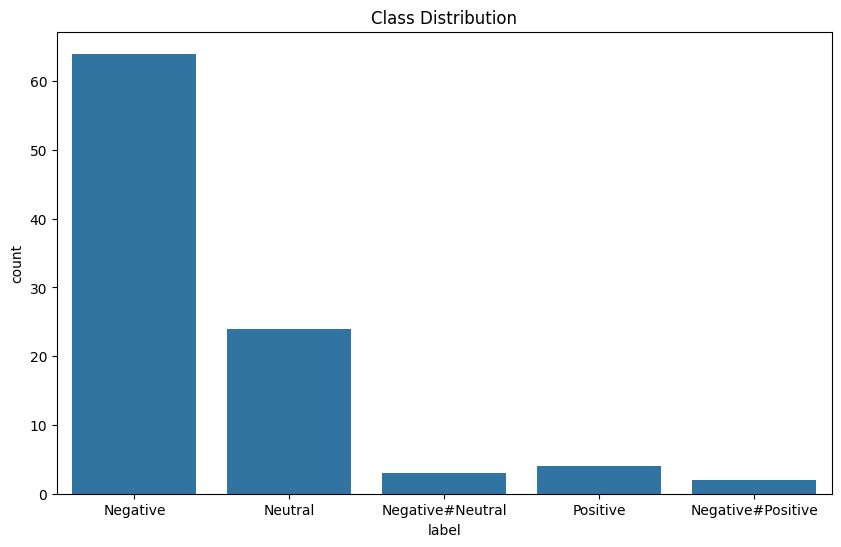

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='label')
plt.title('Class Distribution')
plt.show()

b. Text length analysis

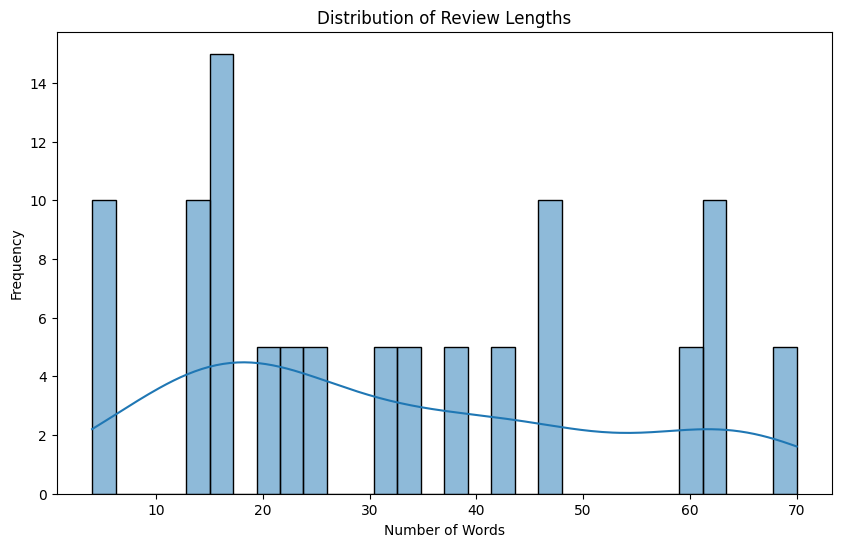

In [11]:
df['Text_Length'] = df['Cleaned_Review'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(df['Text_Length'], bins=30, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

c. word frequency analysis

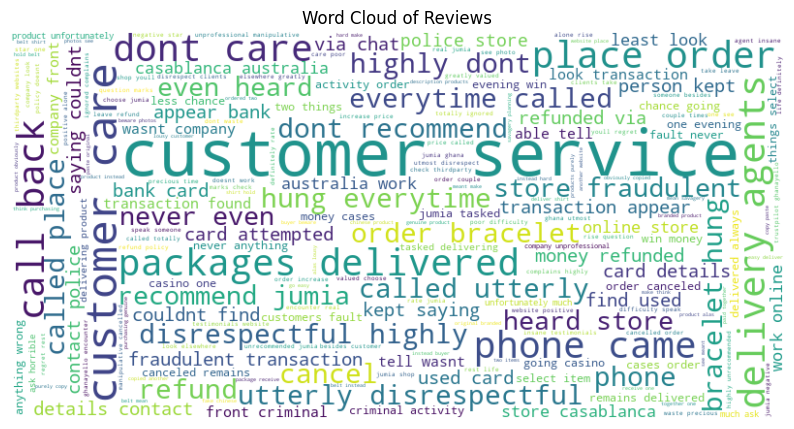

In [12]:
from wordcloud import WordCloud

text = ' '.join(df['Cleaned_Review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

4. Feature Extraction

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [20]:
#Initialize count vectorizer with options
vectorizer = CountVectorizer(
    ngram_range=(1, 2),           
    max_features=5000,           
    stop_words='english',         
    min_df=5                      
)

X = vectorizer.fit_transform(df['Cleaned_Review'])

X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

X_df.to_csv('feature_matrix_with_options.csv', index=False)
